In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time


In [3]:
data_file_name = 'data-v18-21-29-17-06-21'
df_basic = pd.read_csv('data/'+ data_file_name +'.csv', encoding= 'ISO-8859-8')


In [4]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [5]:
def remove_nan_rows(data,col):
    data = data.dropna(subset = ['PricePerSq'])
    return data

In [6]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37667 entries, 0 to 37666
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37667 non-null  int64  
 1   Date        37667 non-null  object 
 2   City        37667 non-null  object 
 3   Street      28604 non-null  object 
 4   Rooms       37658 non-null  float64
 5   Surface     37667 non-null  int64  
 6   Floor       24278 non-null  float64
 7   Price       37640 non-null  object 
 8   PricePerSq  37501 non-null  object 
 9   BuildYear   37666 non-null  float64
 10  DealYear    37667 non-null  float64
 11  DealMonth   37667 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 3.4+ MB


In [61]:
df_basic = remove_nan_rows(df_basic,'PricePerSq')

#handle columns types
df_basic['PricePerSq'] = df_basic['PricePerSq'].astype(str).str.replace(',', '').astype(int)
df_basic['DealYear'] = df_basic['DealYear'].astype(int)
df_basic['Price'] = df_basic['Price'].astype(str).str.replace(',', '').astype(int)

cities = df_basic.City.unique()
df_clear= pd.DataFrame({'Date': [],'City':[],'Street': [],'Rooms':[],'Surface':[],'Floor':[],'Price':[],'PricePerSq':[],'BuildYear': [],'DealYear': [],'DealMonth': []})

for city in cities:
    df_temp = df_basic.loc[df_basic['City'] == city]
    df_temp = remove_outlier(df_temp,'PricePerSq')
    df_clear = pd.concat([df_clear,df_temp],ignore_index=True)
df_basic['PricePerSq'] = df_basic['PricePerSq'].astype(str).str.replace(',', '').astype(int)

fileName = data_file_name + '_cleaned'
df_clear.to_csv('data/'+ fileName + '.csv', encoding = "ISO-8859-8")


In [62]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37501 entries, 0 to 37666
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37501 non-null  int64  
 1   Date        37501 non-null  object 
 2   City        37501 non-null  object 
 3   Street      28486 non-null  object 
 4   Rooms       37492 non-null  float64
 5   Surface     37501 non-null  int64  
 6   Floor       24173 non-null  float64
 7   Price       37501 non-null  int32  
 8   PricePerSq  37501 non-null  int32  
 9   BuildYear   37500 non-null  float64
 10  DealYear    37501 non-null  int32  
 11  DealMonth   37501 non-null  float64
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 3.3+ MB


In [11]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36227 entries, 0 to 36226
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        36227 non-null  object 
 1   City        36227 non-null  object 
 2   Street      27537 non-null  object 
 3   Rooms       36221 non-null  float64
 4   Surface     36227 non-null  float64
 5   Floor       23574 non-null  float64
 6   Price       36227 non-null  float64
 7   PricePerSq  36227 non-null  float64
 8   BuildYear   36227 non-null  float64
 9   DealYear    36227 non-null  float64
 10  DealMonth   36227 non-null  float64
 11  Unnamed: 0  36227 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


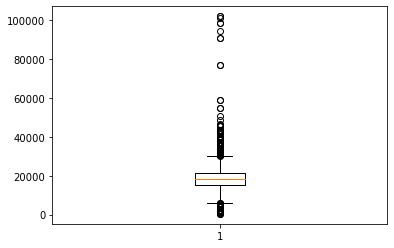

In [12]:
plt.boxplot(df_basic.loc[df_basic['City'] == 'holon']["PricePerSq"])
plt.show()

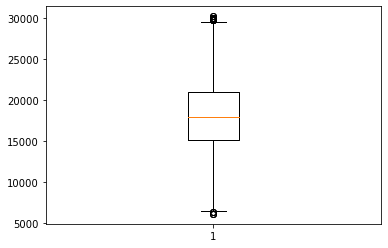

In [13]:
df_test = df_clear.loc[df_clear['City'] == 'holon']["PricePerSq"]
plt.boxplot(df_test)
plt.show()
